# PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK

### STEP 0: PROBLEM STATEMENT
The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017.

Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

Dataset contains the following columns:
ID: Unique identifier for the record.
Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
Date: Date when the incident occurred.
Block: address where the incident occurred
IUCR: The Illinois Unifrom Crime Reporting code.
Primary Type: The primary description of the IUCR code.
Description: The secondary description of the IUCR code, a subcategory of the primary description.
Location Description: Description of the location where the incident occurred.
Arrest: Indicates whether an arrest was made.
Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
District: Indicates the police district where the incident occurred.
Ward: The ward (City Council district) where the incident occurred.
Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
Year: Year the incident occurred.
Updated On: Date and time the record was last updated.
Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

Intall fbprophet package: "pip install fbprophet" 
                        or "conda install -c conda forge fbprohet"
                        
Prophet is open source software released by Facebook’s Core Data Science team.
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
Prophet works best with time series that have strong seasonal effects and several seasons of historical data.
For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/ https://facebook.github.io/prophet/docs/quick_start.html#python-api

### STEP 1: IMPORTING DATA



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from dateutil.easter import easter

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


fix issue with fbprophet:
   link: https://stackoverflow.com/questions/60145006/cannot-import-name-easter-from-holidays
   
   Replace line 16 in fbprophet/hdays.py (\AppData\Local\Continuum\anaconda3\Lib\site-packages\fbprophet\hdays.py):

      from holidays import WEEKEND, HolidayBase, easter, rd


to

      from holidays import WEEKEND, HolidayBase
      from dateutil.easter import easter
      from dateutil.relativedelta import relativedelta as rd

In [2]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df_1.shape


(1872343, 23)

In [4]:
chicago_df_2.shape



(2688710, 23)

In [5]:
chicago_df_3.shape



(1456714, 23)

In [6]:
#concate many dataframes into one
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

### STEP 2: EXPLORING DATA

In [7]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [8]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


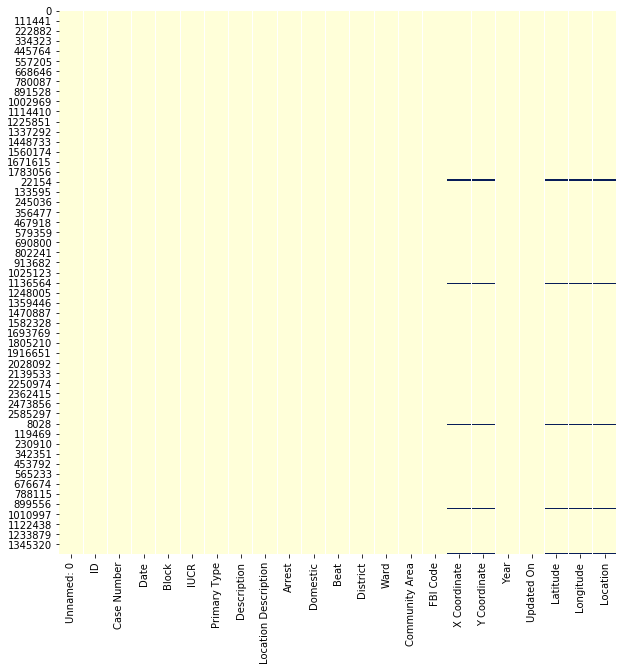

In [9]:
#check missing data
plt.figure(figsize =(10, 10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [10]:
#drop uncompleted columns
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Year', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [11]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Updated On
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,26,04/15/2016 08:55:02 AM
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,18,04/15/2016 08:55:02 AM
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,04A,04/15/2016 08:55:02 AM
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,08B,04/15/2016 08:55:02 AM
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,18,04/15/2016 08:55:02 AM
...,...,...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,08B,05/10/2016 03:56:50 PM
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,14,05/10/2016 03:56:50 PM
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,04B,05/10/2016 03:56:50 PM
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,08B,05/10/2016 03:56:50 PM


In [12]:
#assemble data time
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')
                                                            #month/day/year  hour:minute:second space

In [13]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [14]:
#to use resample() later
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [15]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Updated On
Date,,,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,26,04/15/2016 08:55:02 AM
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,18,04/15/2016 08:55:02 AM
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,04A,04/15/2016 08:55:02 AM
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,08B,04/15/2016 08:55:02 AM
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,18,04/15/2016 08:55:02 AM
...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,08B,05/10/2016 03:56:50 PM
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,14,05/10/2016 03:56:50 PM
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,04B,05/10/2016 03:56:50 PM


In [16]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [17]:
chicago_df['Primary Type'].value_counts()[:15] #the top 15

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [18]:
chicago_df['Primary Type'].value_counts()[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

In [19]:
order_data = chicago_df['Primary Type'].value_counts()[:15].index

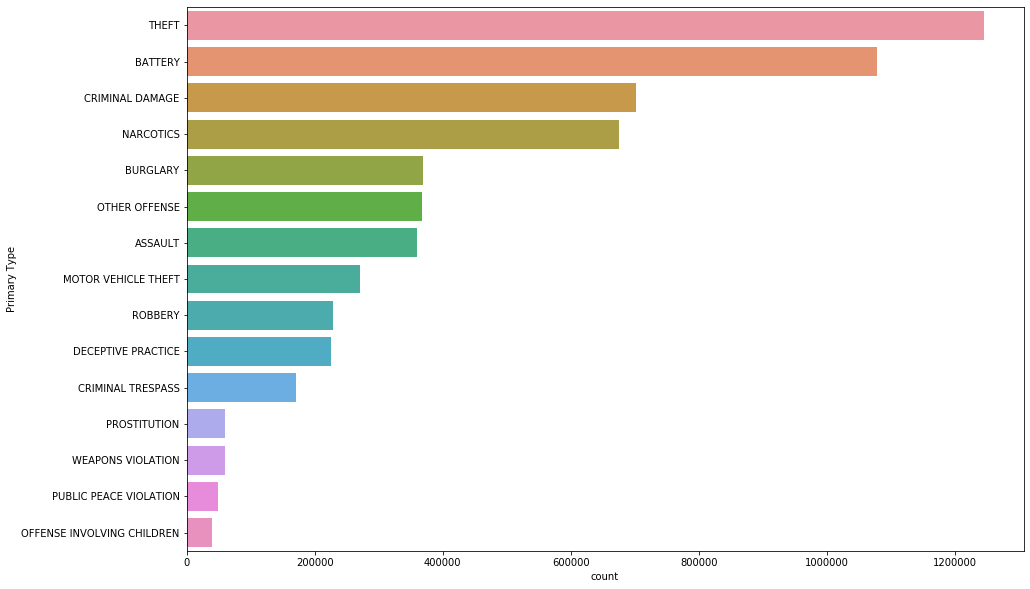

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Primary Type', data = chicago_df, order = order_data)

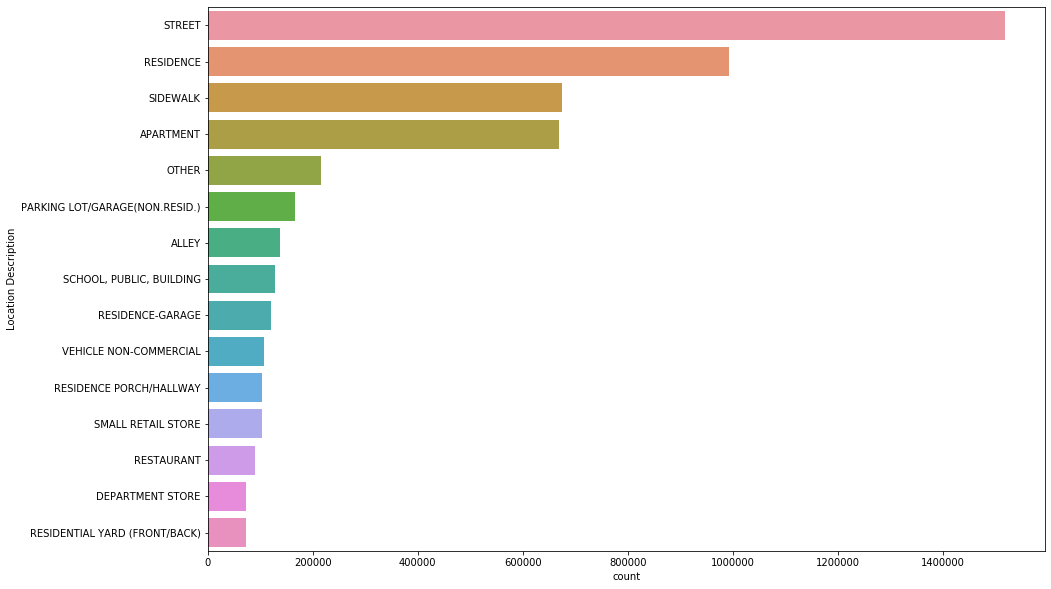

In [21]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [22]:
chicago_df.resample('Y').size() # samples occured in years: 'Y'

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

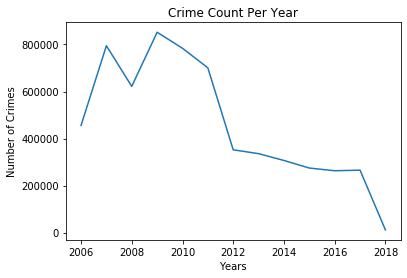

In [23]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [24]:
#frequency occur per month
chicago_df.resample('M').size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

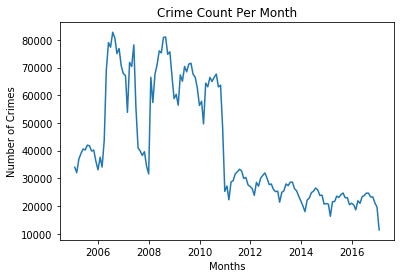

In [25]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

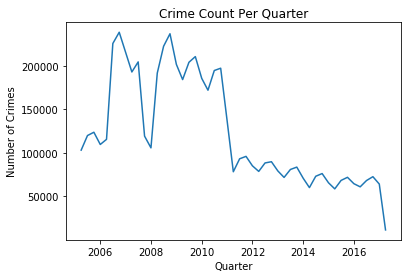

In [26]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

### STEP 3: PREPARING DATA

In [27]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [28]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [29]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [30]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [31]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date': 'ds', 'Crime Count': 'y'})

In [32]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


### STEP 4: MAKE PREDICTIONS

In [34]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [36]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60424.697099,38503.956934,71704.948263,60424.697099,60424.697099,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,0.0,0.0,0.0,55602.186301
1,2005-02-28,60293.923673,33963.287139,66771.958251,60293.923673,60293.923673,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,0.0,0.0,0.0,50798.362050
2,2005-03-31,60149.138810,42240.305692,76035.985108,60149.138810,60149.138810,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,0.0,0.0,0.0,58891.800529
3,2005-04-30,60009.024425,43929.188412,78263.163312,60009.024425,60009.024425,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,0.0,0.0,0.0,61130.375194
4,2005-05-31,59864.239561,47663.615458,81257.310787,59864.239561,59864.239561,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,0.0,0.0,0.0,65278.658753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9645.903360,-10753.742490,22580.426316,9493.998605,9796.995021,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,0.0,0.0,0.0,5527.282859
506,2018-01-28,9632.572677,-10889.470412,22123.612357,9480.179091,9784.244507,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,0.0,0.0,0.0,5368.342086
507,2018-01-29,9619.241995,-12211.285733,23453.308445,9466.359576,9771.493994,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,0.0,0.0,0.0,5196.855676
508,2018-01-30,9605.911313,-11466.013335,21815.623765,9452.540062,9758.786396,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,0.0,0.0,0.0,5013.145902


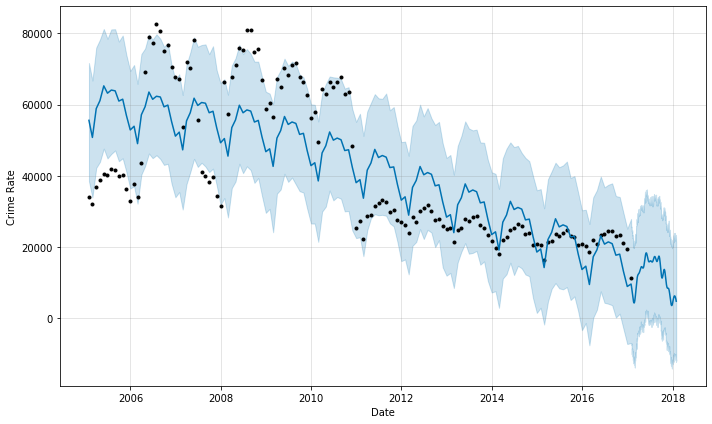

In [38]:
figure = m.plot(forecast, xlabel= 'Date', ylabel= 'Crime Rate')


This is the data point that actually provided the black both points.

OK.

This is the data points provided this is the actual trend.

And those guys can see here beyond 2007.

It's actually predicting what's going to happen as well in this year in 2008 and moving forward.

Which is incredible.

What we could do as well is that we can try to predict what's going to happen as well within the within

a specific year.

We can take a look at the roll call it seasonality within the year.



/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


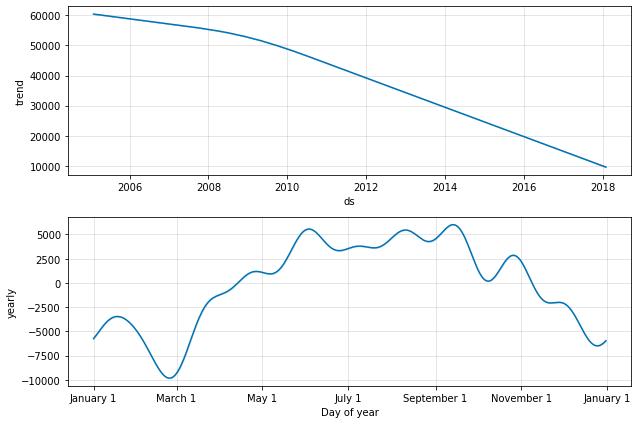

In [39]:
figure = m.plot_components(forecast)

In [40]:
#predict in next 2 years
future = m.make_future_dataframe(periods=721)
forecast = m.predict(future)

/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


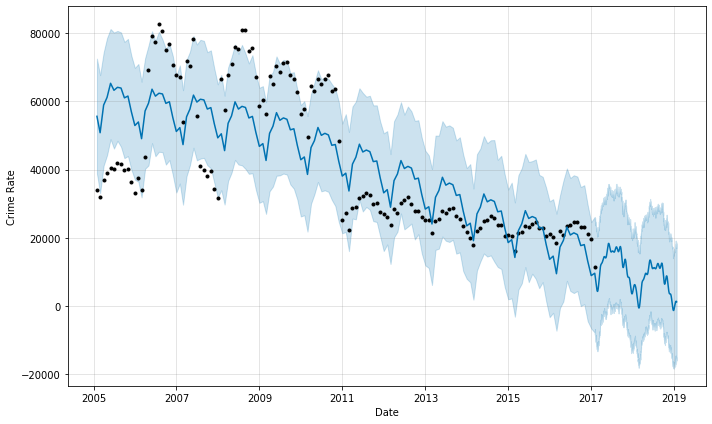

In [41]:
figure = m.plot(forecast, xlabel= 'Date', ylabel= 'Crime Rate')

/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


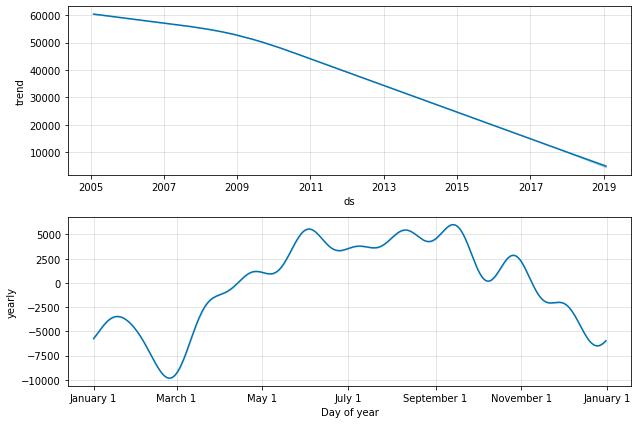

In [42]:
figure = m.plot_components(forecast)